# An√°lisis de Evasi√≥n de Clientes - Telecom X

Este notebook documenta el proceso de an√°lisis exploratorio de datos (EDA) para el desaf√≠o de churn de clientes.

In [35]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Extracci√≥n de datos
Descargamos el archivo JSON desde la API de GitHub y lo cargamos en un DataFrame.

In [36]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = pd.read_json(io.StringIO(response.text))
data.head(2)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...

## 2. Exploraci√≥n inicial del dataset
Mostramos informaci√≥n general y las primeras filas.

In [37]:
print(data.info(2))
print(data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL',

## 3. Desanidado de columnas anidadas
Expandimos las columnas que contienen diccionarios para facilitar el an√°lisis.

In [38]:
cols_to_expand = ['customer', 'phone', 'internet', 'account']
for col in cols_to_expand:
    if col in data.columns:
        expanded = pd.json_normalize(data[col])
        expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
        data = pd.concat([data.drop(col, axis=1), expanded], axis=1)
data.head(2)

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   

  account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  

[2 rows x 21 columns]

## 4. Limpieza y estandarizaci√≥n de datos
Estandarizamos valores y reemplazamos inconsistencias.

In [39]:
# Estandarizar columnas Yes/No
yes_no_cols = [col for col in data.columns if data[col].isin(['Yes', 'No']).all()]
for col in yes_no_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Reemplazar strings vac√≠os por NaN
data.replace('', np.nan, inplace=True)

## 5. An√°lisis descriptivo y visualizaciones

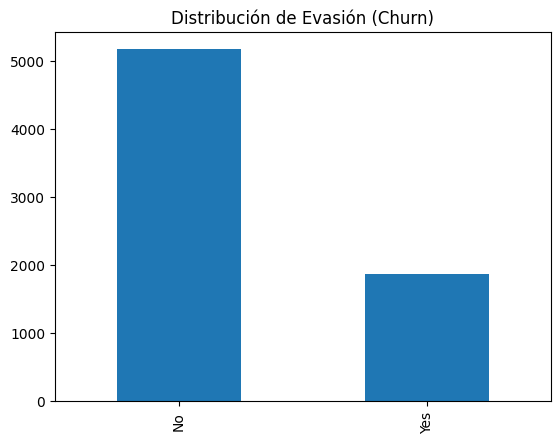

In [40]:
data.describe()
data['Churn'].value_counts().plot(kind='bar')
plt.title('Distribuci√≥n de Evasi√≥n (Churn)')
plt.show()

## 6. Conclusiones e insights
(Escribe aqu√≠ tus hallazgos y recomendaciones)
Consejos
Usa celdas Markdown para explicar cada paso.
Ejecuta cada celda y revisa los resultados antes de avanzar.
Puedes copiar y pegar el c√≥digo que ya tienes, adapt√°ndolo a celdas separadas.
¬øQuieres que te genere una plantilla de notebook (.ipynb) lista para usar, o prefieres que te ayude a migrar paso a paso tu c√≥digo actual?

-------
Perfecto! Ya tienes tu DataFrame limpio, desanidado y listo para an√°lisis. Has avanzado hasta el punto 6 de la gu√≠a, que es:

-------
### 6. An√°lisis de churn por variables relevantes

#### Objetivo:

Explorar c√≥mo se distribuye la evasi√≥n de clientes (Churn) seg√∫n variables categ√≥ricas importantes, como g√©nero, tipo de contrato, m√©todo de pago, etc. Esto te ayudar√° a identificar patrones y posibles factores de riesgo.

---------

### ¬øQu√© hacer en este paso?
#### 1 - Tablas cruzadas (crosstab) y conteos agrupados
Analiza la relaci√≥n entre `Churn` y variables como:

* customer_gender
* Contract
* PaymentMethod
* internet_InternetService
* Cualquier otra columna relevante

### 2 - Visualizaciones

* Gr√°ficos de barras apiladas para ver la proporci√≥n de churn/no churn por cada categor√≠a.
--------

#### Ejemplo de c√≥digo para este paso
### a) Churn por tipo de contrato

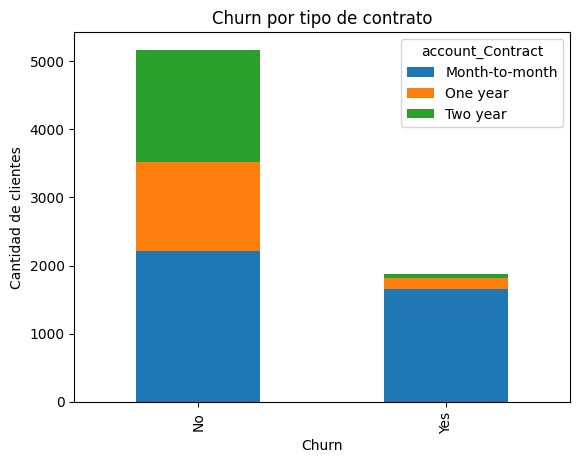

In [41]:
pd.crosstab(data['Churn'], data['account_Contract']).plot(kind='bar', stacked=True)
plt.title('Churn por tipo de contrato')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

#### b) Churn por m√©todo de pago


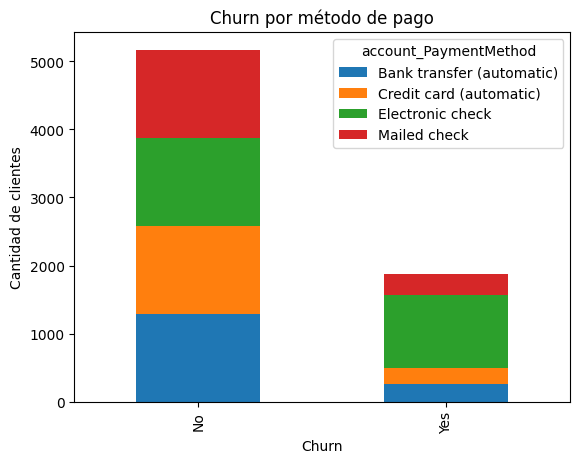

In [42]:
pd.crosstab(data['Churn'], data['account_PaymentMethod']).plot(kind='bar', stacked=True)
plt.title('Churn por m√©todo de pago')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

### c) Churn por g√©nero


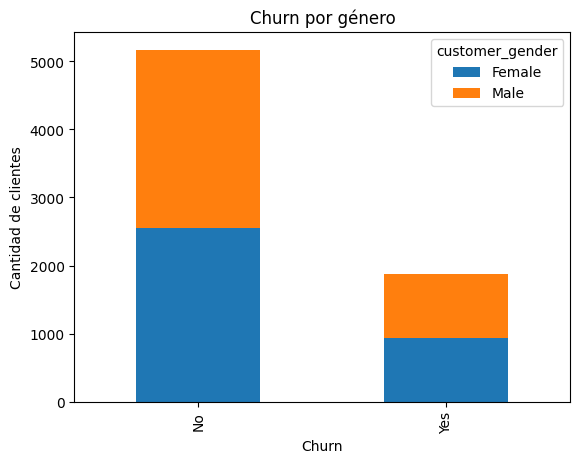

In [43]:
pd.crosstab(data['Churn'], data['customer_gender']).plot(kind='bar', stacked=True)
plt.title('Churn por g√©nero')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

### d) Churn por servicio de internet


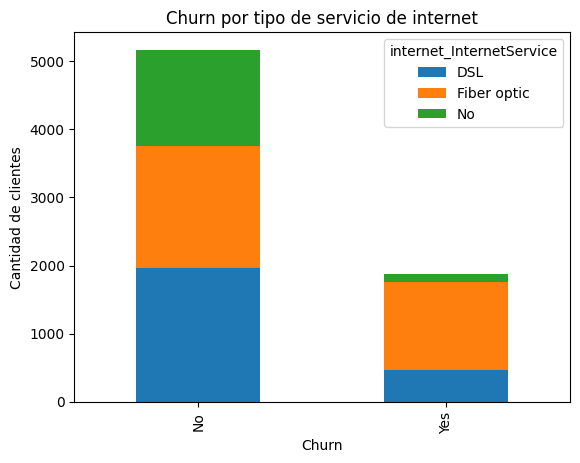

In [44]:
pd.crosstab(data['Churn'], data['internet_InternetService']).plot(kind='bar', stacked=True)
plt.title('Churn por tipo de servicio de internet')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

¬°Excelente trabajo! Ya tienes los gr√°ficos clave para el an√°lisis de churn por variables categ√≥ricas. Vamos a analizarlos y te indico c√≥mo seguir con las consignas del desaf√≠o.
An√°lisis de los gr√°ficos
1. Churn por tipo de contrato
Month-to-month (mes a mes) tiene la mayor cantidad de clientes que se dan de baja (Yes), mientras que los contratos de One year y Two year tienen una tasa de churn mucho menor.
Insight: Los contratos a largo plazo retienen mejor a los clientes.
2. Churn por m√©todo de pago
El m√©todo Electronic check tiene una proporci√≥n mucho mayor de churn que los otros m√©todos.
Bank transfer (automatic) y Credit card (automatic) tienen menos churn.
Insight: Los clientes que pagan con cheque electr√≥nico son m√°s propensos a irse.
3. Churn por g√©nero
No hay una diferencia significativa entre Female y Male en cuanto a churn.
Insight: El g√©nero no parece ser un factor determinante en la evasi√≥n.
4. Churn por tipo de servicio de internet
Los clientes con Fiber optic tienen una tasa de churn mucho mayor que los de DSL o los que no tienen servicio de internet.
Insight: El tipo de tecnolog√≠a de internet influye en la evasi√≥n, siendo la fibra √≥ptica la m√°s riesgosa.
¬øC√≥mo seguir?
7. An√°lisis de churn por variables num√©ricas
Ahora debes analizar c√≥mo se comportan las variables num√©ricas (por ejemplo, Charges.Total, Cuentas_Diarias, customer_tenure) entre los clientes que se quedan y los que se van.
Ejemplo de c√≥digo:

In [45]:
# Comparar medias de cargos totales por churn
data.groupby('Churn')['Charges.Total'].mean().plot(kind='bar')
plt.title('Promedio de Cargos Totales por Churn')
plt.ylabel('Cargos Totales')
plt.show()

# Comparar tenure (antig√ºedad) por churn
data.groupby('Churn')['customer_tenure'].mean().plot(kind='bar')
plt.title('Promedio de Antig√ºedad (tenure) por Churn')
plt.ylabel('Meses')
plt.show()

# Si creaste la columna Cuentas_Diarias:
if 'Cuentas_Diarias' in data.columns:
    data.groupby('Churn')['Cuentas_Diarias'].mean().plot(kind='bar')
    plt.title('Promedio de Cuentas Diarias por Churn')
    plt.ylabel('Cuentas Diarias')
    plt.show()

KeyError: 'Column not found: Charges.Total'

¬°Buena observaci√≥n! El error KeyError: 'Column not found: Charges.Total' indica que la columna no existe con ese nombre exacto en tu DataFrame. Esto puede deberse a:
El nombre real de la columna puede tener un prefijo (por ejemplo, account_Charges.Total).
Puede haber un error de may√∫sculas/min√∫sculas o de formato.
¬øC√≥mo encontrar el nombre correcto de la columna?
Ejecuta este c√≥digo para listar todas las columnas y encontrar el nombre exacto:

In [ ]:
print(data.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total', 'Churn_bin']


¬°Perfecto! Ahora que tenemos la lista de columnas, aqu√≠ est√°n los nombres correctos para tu an√°lisis:
* Cargos mensuales: `account_Charges.Monthly`
* Cargos totales: `account_Charges.Total`
* Tipo de contrato: `account_Contract`
* M√©todo de pago: `account_PaymentMethod`
* Churn binario: `Churn_bin`
* Antig√ºedad: `customer_tenure`

### Ejemplo de an√°lisis con los nombres correctos
####  1. Promedio de cargos totales por churn

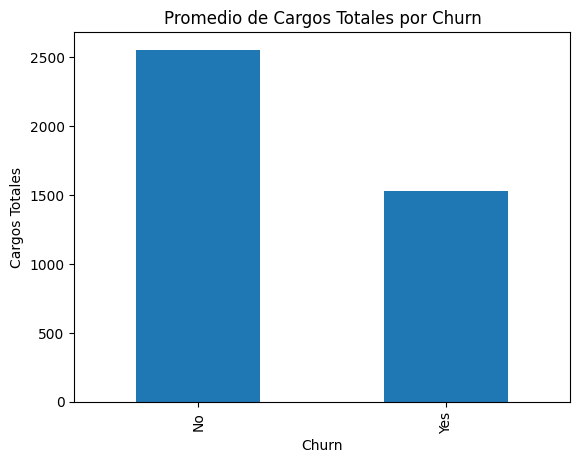

In [ ]:
data.groupby('Churn')['account_Charges.Total'].mean().plot(kind='bar')
plt.title('Promedio de Cargos Totales por Churn')
plt.ylabel('Cargos Totales')
plt.show()

¬°Muy buen punto! Ese error (TypeError: Could not convert 593.3542.4571.457904) ocurre porque la columna account_Charges.Total contiene valores que no son num√©ricos puros, probablemente est√°n en formato string y/o tienen caracteres no v√°lidos (como puntos decimales mal puestos, comas, o incluso valores vac√≠os).
¬øC√≥mo solucionarlo?
1. Convierte la columna a num√©rica correctamente
Usa pd.to_numeric() con el par√°metro errors='coerce' para convertir los valores no num√©ricos en NaN:

In [ ]:
data['account_Charges.Total'] = pd.to_numeric(data['account_Charges.Total'], errors='coerce')

Esto convertir√° cualquier valor que no pueda interpretarse como n√∫mero en NaN, permitiendo el an√°lisis num√©rico.
2. Verifica si hay valores nulos tras la conversi√≥n
### 2. Verifica si hay valores nulos tras la conversi√≥n


In [ ]:
print(data['account_Charges.Total'].isnull().sum())

11


8. (Opcional) An√°lisis de correlaci√≥n
Puedes ver qu√© variables num√©ricas est√°n m√°s relacionadas con el churn.

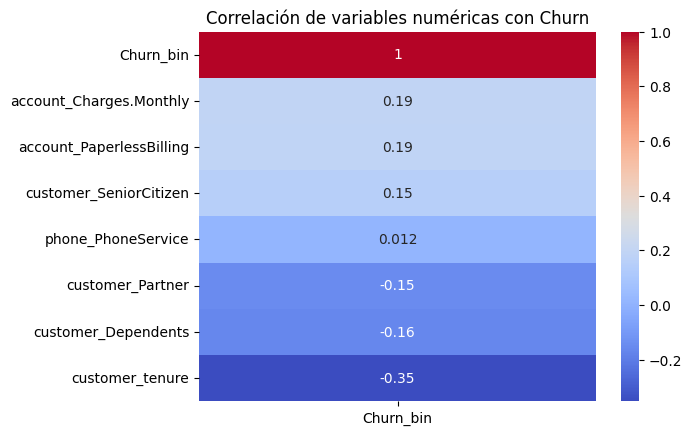

In [ ]:
import seaborn as sns
# Si tienes una columna binaria para churn (0/1), √∫sala aqu√≠
data['Churn_bin'] = data['Churn'].map({'Yes': 1, 'No': 0})
corr = data.corr(numeric_only=True)
sns.heatmap(corr[['Churn_bin']].sort_values(by='Churn_bin', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlaci√≥n de variables num√©ricas con Churn')
plt.show()

9. Informe final
Estructura tu notebook/script as√≠:
Introducci√≥n: Explica el objetivo y el problema de churn.
Limpieza y tratamiento: Resume c√≥mo desanidaste y limpiaste los datos.
An√°lisis exploratorio: Incluye los gr√°ficos y hallazgos anteriores.
Conclusiones e insights: Resume los factores de riesgo y patrones encontrados.
Recomendaciones: Sugiere acciones (por ejemplo, incentivar contratos largos, revisar el servicio de fibra √≥ptica, etc.).

¬°Eso es! Vamos a seguir con el an√°lisis profesional y estructurado. Aqu√≠ tienes el siguiente roadmap, con sugerencias de c√≥digo y enfoque de interpretaci√≥n:
## 1. Limpieza profesional de columnas num√©ricas
Aseg√∫rate de que todas las columnas num√©ricas est√©n correctamente convertidas:

In [ ]:
# Convierte cargos mensuales y totales a num√©rico
data['account_Charges.Monthly'] = pd.to_numeric(data['account_Charges.Monthly'], errors='coerce')
data['account_Charges.Total'] = pd.to_numeric(data['account_Charges.Total'], errors='coerce')

2. An√°lisis de variables num√©ricas por churn
a) Cargos totales

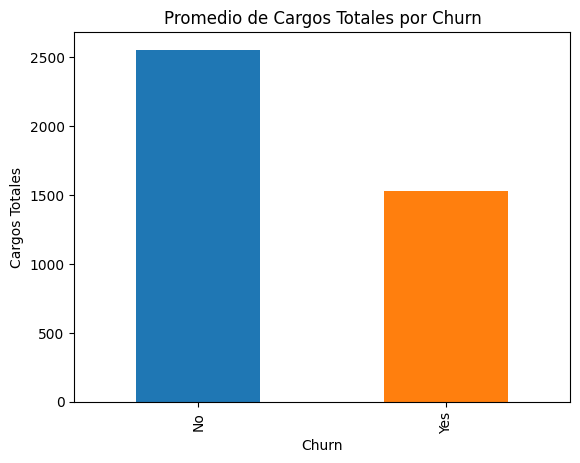

In [ ]:
data.groupby('Churn')['account_Charges.Total'].mean().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Promedio de Cargos Totales por Churn')
plt.ylabel('Cargos Totales')
plt.show()

b) Cargos mensuales


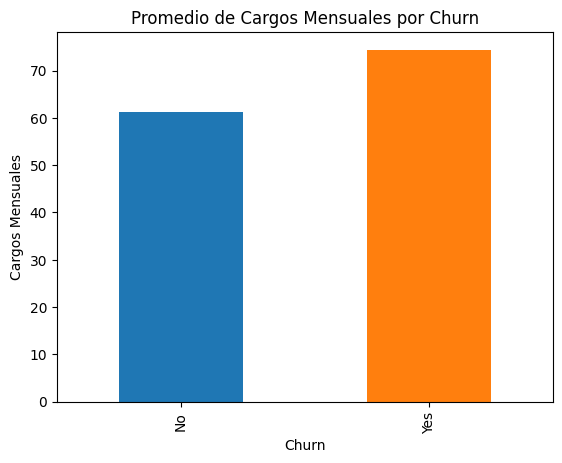

In [ ]:
data.groupby('Churn')['account_Charges.Monthly'].mean().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Promedio de Cargos Mensuales por Churn')
plt.ylabel('Cargos Mensuales')
plt.show()

c) Antig√ºedad (tenure)


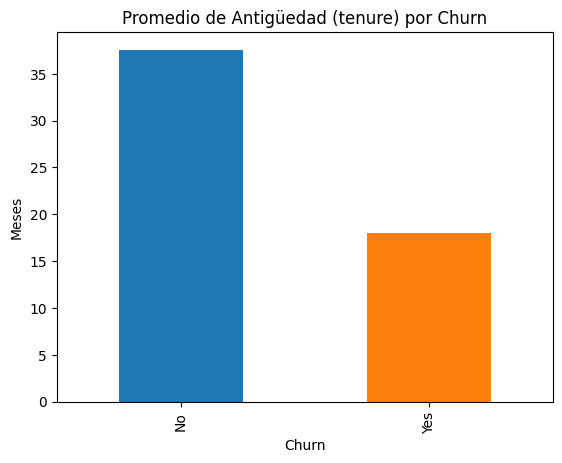

In [ ]:
data.groupby('Churn')['customer_tenure'].mean().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Promedio de Antig√ºedad (tenure) por Churn')
plt.ylabel('Meses')
plt.show()

3. Visualizaci√≥n avanzada: Distribuci√≥n de cargos por churn


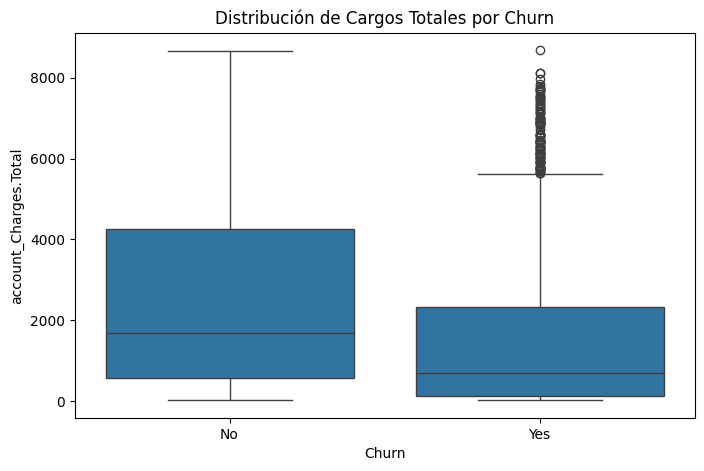

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account_Charges.Total', data=data)
plt.title('Distribuci√≥n de Cargos Totales por Churn')
plt.show()

4. Correlaci√≥n de variables num√©ricas con churn


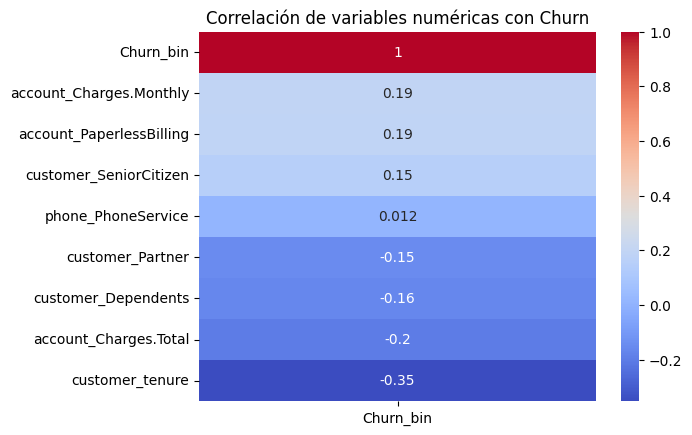

In [ ]:
# Ya tienes Churn_bin (1=Yes, 0=No)
corr = data.corr(numeric_only=True)
sns.heatmap(corr[['Churn_bin']].sort_values(by='Churn_bin', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlaci√≥n de variables num√©ricas con Churn')
plt.show()

5. Conclusiones e insights
5. Conclusiones e insights
¬øQu√© variables num√©ricas muestran mayor diferencia entre clientes que se quedan y los que se van?
¬øQu√© variables tienen mayor correlaci√≥n con churn?
¬øQu√© patrones visuales observas en los boxplots?
6. Informe final (estructura recomendada)
Introducci√≥n: Explica el objetivo y contexto.
Limpieza y tratamiento: Resume c√≥mo preparaste los datos.
An√°lisis exploratorio: Incluye gr√°ficos y hallazgos.
Conclusiones e insights: Enumera los factores de riesgo y patrones.
Recomendaciones: Sugiere acciones para reducir el churn.
¬øQuieres que te ayude a redactar el informe final, interpretar los resultados de los gr√°ficos, o a preparar visualizaciones a√∫n m√°s avanzadas? ¬°Dime por d√≥nde seguimos y seguimos como un pro! üöÄ

# Telecom X ‚Äì Parte 2: Predicci√≥n de Cancelaci√≥n (Churn)
üì£ Historia del Desaf√≠o

¬°Felicidades! üéâ Has sido promovido despu√©s de tu excelente desempe√±o en el an√°lisis exploratorio de la cancelaci√≥n de clientes en Telecom X. Tu dedicaci√≥n, claridad al comunicar los datos y visi√≥n estrat√©gica marcaron la diferencia.

Ahora, ¬°has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

üéØ Misi√≥n

Tu nueva misi√≥n es desarrollar modelos predictivos capaces de prever qu√© clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelaci√≥n, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

üß† Objetivos del Desaf√≠o

Preparar los datos para el modelado (tratamiento, codificaci√≥n, normalizaci√≥n).

Realizar an√°lisis de correlaci√≥n y selecci√≥n de variables.

Entrenar dos o m√°s modelos de clasificaci√≥n.

Evaluar el rendimiento de los modelos con m√©tricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusi√≥n estrat√©gica se√±alando los principales factores que influyen en la cancelaci√≥n.

üß∞ Lo que vas a practicar

‚úÖ Preprocesamiento de datos para Machine Learning ‚úÖ Construcci√≥n y evaluaci√≥n de modelos predictivos ‚úÖ Interpretaci√≥n de resultados y entrega de insights ‚úÖ Comunicaci√≥n t√©cnica con enfoque estrat√©gico

üöÄ Ahora eres: Analista Junior de Machine Learning

Telecom X conf√≠a en tu entrega para dar los pr√≥ximos pasos hacia una soluci√≥n de inteligencia predictiva eficaz. ¬°Buena suerte!

1- Extracci√≥n del Archivo Tratado
Descripci√≥n Carga el archivo CSV que contiene los datos tratados anteriormente. üìÇ Atenci√≥n: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desaf√≠o Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

2 - Eliminaci√≥n de Columnas Irrelevantes
Descripci√≥n Elimina columnas que no aportan valor al an√°lisis o a los modelos predictivos, como identificadores √∫nicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicci√≥n de la cancelaci√≥n y pueden incluso perjudicar el desempe√±o de los modelos.

3 - Encoding
Descripci√≥n Transforma las variables categ√≥ricas a formato num√©rico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un m√©todo de codificaci√≥n adecuado, como one-hot encoding.

üîé Sugerencia: Puedes consultar este art√≠culo para entender mejor cu√°ndo usar get_dummies o OneHotEncoder: Art√≠culo en Alura sobre codificaci√≥n categ√≥rica

4 - Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)
Descripci√≥n Calcula la proporci√≥n de clientes que cancelaron en relaci√≥n con los que permanecieron activos. Eval√∫a si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el an√°lisis de los resultados.

üîé Sugerencia: Puedes usar value_counts() de pandas para obtener esta proporci√≥n: Documentaci√≥n oficial de value_counts()

5 - Balanceo de Clases (opcional)
Descripci√≥n Si deseas profundizar en el an√°lisis, aplica t√©cnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser √∫tiles para generar ejemplos sint√©ticos de la clase minoritaria.

üîé Sugerencia: Puedes leer m√°s sobre c√≥mo manejar el desbalanceo de clases en este art√≠culo: Art√≠culo en Alura sobre desbalanceo de datos

6 - Normalizaci√≥n o Estandarizaci√≥n (si es necesario)
Eval√∫a la necesidad de normalizar o estandarizar los datos, seg√∫n los modelos que se aplicar√°n. Modelos basados en distancia, como KNN, SVM, Regresi√≥n Log√≠stica y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en √°rboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

üîé Sugerencia: Puedes leer m√°s sobre normalizaci√≥n y estandarizaci√≥n de datos en este art√≠culo: Art√≠culo en Medium sobre normalizaci√≥n y estandarizaci√≥n en Machine Learning

7 - üéØ Correlaci√≥n y Selecci√≥n de Variables
An√°lisis de Correlaci√≥n
Descripci√≥n
Visualiza la matriz de correlaci√≥n para identificar relaciones entre las variables num√©ricas. Presta especial atenci√≥n a las variables que muestran una mayor correlaci√≥n con la cancelaci√≥n, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

8 - An√°lisis Dirigido
Descripci√≥n Investiga c√≥mo variables espec√≠ficas se relacionan con la cancelaci√≥n, tales como:

Tiempo de contrato √ó Cancelaci√≥n

Gasto total √ó Cancelaci√≥n

Utiliza gr√°ficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

9 - ü§ñ Modelado Predictivo
Separaci√≥n de Datos
Descripci√≥n Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una divisi√≥n com√∫n es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tama√±o de la base de datos.

10 - Creaci√≥n de Modelos
Descripci√≥n Crea al menos dos modelos diferentes para predecir la cancelaci√≥n de clientes.

Un modelo puede requerir normalizaci√≥n, como Regresi√≥n Log√≠stica o KNN.

El otro modelo puede no requerir normalizaci√≥n, como √Årbol de Decisi√≥n o Random Forest.

üí° La decisi√≥n de aplicar o no la normalizaci√≥n depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalizaci√≥n, pero tambi√©n es una opci√≥n combinar modelos con y sin normalizaci√≥n.

Justificaci√≥n:
Regresi√≥n Log√≠stica / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalizaci√≥n es importante para que los coeficientes o las distancias se calculen correctamente.

√Årbol de Decisi√≥n / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalizaci√≥n.

Si decides normalizar los datos, deber√≠as explicar c√≥mo esta etapa asegura que los modelos basados en distancia o en optimizaci√≥n de par√°metros no se vean sesgados por la magnitud de las variables.

11 - Evaluaci√≥n de los Modelos
Descripci√≥n Eval√∫a cada modelo utilizando las siguientes m√©tricas:

Exactitud (Acur√°cia)

Precisi√≥n

Recall

F1-score

Matriz de confusi√≥n

Despu√©s, realiza un an√°lisis cr√≠tico y compara los modelos:

¬øCu√°l modelo tuvo el mejor desempe√±o?

¬øAlg√∫n modelo present√≥ overfitting o underfitting? Si es as√≠, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus par√°metros.

üìã 12 - Interpretaci√≥n y Conclusiones
An√°lisis de la Importancia de las Variables
Descripci√≥n Despu√©s de elegir los modelos, realiza el an√°lisis de las variables m√°s relevantes para la predicci√≥n de la cancelaci√≥n:

Regresi√≥n Log√≠stica: Investiga los coeficientes de las variables, que muestran su contribuci√≥n a la predicci√≥n de cancelaci√≥n.

KNN (K-Nearest Neighbors): Observa c√≥mo los vecinos m√°s cercanos influyen en la decisi√≥n de clasificaci√≥n. Las variables m√°s impactantes pueden ser aquellas que m√°s contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia bas√°ndose en c√≥mo cada variable contribuye a la reducci√≥n de la impureza durante las divisiones de los √°rboles.

SVM (Support Vector Machine): En el SVM, las variables m√°s relevantes son aquellas que influyen en la frontera de decisi√≥n entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qu√© variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el an√°lisis de m√©tricas espec√≠ficas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en t√©cnicas de boosting (como XGBoost).

13 - Conclusi√≥n
Descripci√≥n Elaboren un informe detallado, destacando los factores que m√°s influyen en la cancelaci√≥n, bas√°ndose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelaci√≥n de clientes y propongan estrategias de retenci√≥n basadas en los resultados obtenidos.

# Exportar a .csv:
¬øC√≥mo exportar tu DataFrame final a CSV?
Agrega al final de tu notebook o script de la Parte 1 (despu√©s de toda la limpieza y transformaci√≥n):


In [ ]:
# Exporta el DataFrame limpio y listo para modelado
data.to_csv('telecomx_tratado.csv', index=False)

Esto crear√° el archivo telecomx_tratado.csv en tu directorio de trabajo, listo para ser usado en la Parte 2.
¬øQu√© columnas debe tener el archivo exportado?
Solo las columnas relevantes para el modelado (sin identificadores √∫nicos ni columnas anidadas).
Todas las variables deben estar limpias, estandarizadas y listas para encoding.
¬øQu√© hacer despu√©s?
Ejecuta la exportaci√≥n en tu notebook/script de la Parte 1.
Verifica que el archivo telecomx_tratado.csv se haya creado correctamente.
Contin√∫a con la Parte 2 cargando ese archivo con pd.read_csv('telecomx_tratado.csv').

# Pipeline de Machine Learning para Predicci√≥n de Churn ‚Äì Telecom X

## 1. Carga del archivo tratado

In [55]:
import pandas as pd

# Carga el archivo CSV tratado (ajusta el nombre si es necesario)
# Exporta el DataFrame limpio
data.to_csv('telecomx_tratado.csv', index=False)
data.head(3)

customerID Churn customer_gender  customer_SeniorCitizen  customer_Partner  \
0  0002-ORFBO    No          Female                       0                 1   
1  0003-MKNFE    No            Male                       0                 0   
2  0004-TLHLJ   Yes            Male                       0                 0   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   

  phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
0                  No                      DSL  ...                   Yes   
1                 Yes                      DSL  ...                    No   
2                  No              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                        1   
1                      Yes   Month-to-month                        0   
2                       No   Month-to-month                        1   

   account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0           Mailed check                    65.6                 593.30  
1           Mailed check                    59.9                 542.40  
2       Electronic check                    73.9                 280.85  

[3 rows x 21 columns]

## 2. Eliminaci√≥n de columnas irrelevantes


In [56]:
# Elimina identificadores √∫nicos y cualquier columna no relevante
data = data.drop(columns=['customerID'])

## 3. Encoding de variables categ√≥ricas


In [57]:
# Identifica columnas categ√≥ricas
cat_cols = data.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')  # Excluye la variable objetivo si es categ√≥rica

# One-hot encoding
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

## 4. Verificaci√≥n de la proporci√≥n de churn


In [58]:
print(data['Churn'].value_counts(normalize=True))

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


Si la variable objetivo es "Yes"/"No", convi√©rtela a binaria:


In [59]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

### 5. Balanceo de clases (opcional)


In [ ]:
!pip install imbalanced-learn


¬°Buen aviso! El error ValueError: Input y contains NaN indica que la variable objetivo y (columna Churn) contiene valores nulos (NaN). SMOTE no puede trabajar con valores faltantes en la variable objetivo.
¬øC√≥mo solucionarlo?
1. Verifica los valores nulos en la columna Churn

In [61]:
print(data['Churn'].isnull().sum())
print(data['Churn'].value_counts(dropna=False))

224
0.0    5174
1.0    1869
NaN     224
Name: Churn, dtype: int64


2. Limpia los valores nulos
Tienes varias opciones:
Opci√≥n A: Eliminar filas con valores nulos en Churn

In [62]:
data = data.dropna(subset=['Churn'])

Opci√≥n B: Reemplazar valores nulos con el valor m√°s com√∫n


In [63]:
data['Churn'] = data['Churn'].fillna(data['Churn'].mode()[0])

Opci√≥n C: Si hay pocos valores nulos, elim√≠nalos


In [64]:
data = data[data['Churn'].notna()]

3. Verifica que la limpieza funcion√≥


In [65]:
print(data['Churn'].isnull().sum())

0


In [69]:
print(X.isnull().sum())

customer_SeniorCitizen                            0
customer_Partner                                  0
customer_Dependents                               0
customer_tenure                                   0
phone_PhoneService                                0
account_PaperlessBilling                          0
account_Charges.Monthly                           0
account_Charges.Total                            11
customer_gender_Male                              0
phone_MultipleLines_No phone service              0
phone_MultipleLines_Yes                           0
internet_InternetService_Fiber optic              0
internet_InternetService_No                       0
internet_OnlineSecurity_No internet service       0
internet_OnlineSecurity_Yes                       0
internet_OnlineBackup_No internet service         0
internet_OnlineBackup_Yes                         0
internet_DeviceProtection_No internet service     0
internet_DeviceProtection_Yes                     0
internet_Tec

2. Opciones para tratar los NaN en X
A. Eliminar filas con NaN
Si tienes pocos valores faltantes, puedes eliminarlos:

In [77]:
X = X.dropna()
y = y[X.index]  # Aseg√∫rate de alinear y con X

B. Imputar valores faltantes
Si tienes muchos NaN, puedes imputar (rellenar) los valores faltantes. Por ejemplo, con la media para num√©ricos y la moda para categ√≥ricos:

In [76]:
print(X.isnull().sum().sum())  # Debe dar 0

0


In [74]:
# Revisa los tipos de datos de todas las columnas
print(data.dtypes)

Churn                                            float64
customer_SeniorCitizen                             int64
customer_Partner                                   int64
customer_Dependents                                int64
customer_tenure                                    int64
phone_PhoneService                                 int64
account_PaperlessBilling                           int64
account_Charges.Monthly                          float64
account_Charges.Total                            float64
customer_gender_Male                               uint8
phone_MultipleLines_No phone service               uint8
phone_MultipleLines_Yes                            uint8
internet_InternetService_Fiber optic               uint8
internet_InternetService_No                        uint8
internet_OnlineSecurity_No internet service        uint8
internet_OnlineSecurity_Yes                        uint8
internet_OnlineBackup_No internet service          uint8
internet_OnlineBackup_Yes      

¬°Perfecto! Ahora veo el problema. La columna account_Charges.Total es de tipo object (string) cuando deber√≠a ser num√©rica. Esto explica el error que est√°s viendo.
Soluci√≥n: Convierte account_Charges.Total a num√©rico

In [49]:
# Convierte la columna problem√°tica a num√©rico
data['account_Charges.Total'] = pd.to_numeric(data['account_Charges.Total'], errors='coerce')

¬°Perfecto! El resultado 0 indica que ya no tienes valores NaN en tus variables predictoras (X). Ahora puedes continuar con el pipeline de Machine Learning sin problemas.
Siguiente paso: Aplicar SMOTE
Ya puedes ejecutar:

In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Luego, contin√∫a con:
Separar en train/test:


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

Excelente! Ya tienes tus datos balanceados y divididos en conjuntos de entrenamiento y prueba. Ahora est√°s listo para la fase de modelado.
Siguiente paso: Entrenar y evaluar modelos
Te recomiendo probar al menos dos modelos:
Regresi√≥n Log√≠stica (requiere normalizaci√≥n)
Random Forest (no requiere normalizaci√≥n)
1. Regresi√≥n Log√≠stica
a) Normaliza los datos (solo para este modelo):

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

b) Entrena y eval√∫a:


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Regresi√≥n Log√≠stica")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Regresi√≥n Log√≠stica
[[1240  309]
 [ 230 1319]]
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      1549
         1.0       0.81      0.85      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



2. Random Forest


In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
[[1317  232]
 [ 212 1337]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      1549
         1.0       0.85      0.86      0.86      1549

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098



3. Comparar resultados
Observa las m√©tricas: accuracy, precision, recall, f1-score.
Compara la matriz de confusi√≥n de ambos modelos.
Elige el modelo con mejor balance entre precisi√≥n y recall para la clase de churn.
4. Importancia de variables
a) Regresi√≥n Log√≠stica (coeficientes):

In [84]:
import pandas as pd
coef_df = pd.DataFrame({'feature': X_train.columns, 'coef': logreg.coef_[0]})
print(coef_df.sort_values(by='coef', ascending=False).head(10))

                                          feature      coef
6                         account_Charges.Monthly  5.334574
7                           account_Charges.Total  1.407362
15      internet_OnlineBackup_No internet service  0.198348
12                    internet_InternetService_No  0.198348
23   internet_StreamingMovies_No internet service  0.198348
21       internet_StreamingTV_No internet service  0.198348
19       internet_TechSupport_No internet service  0.198348
17  internet_DeviceProtection_No internet service  0.198348
13    internet_OnlineSecurity_No internet service  0.198348
5                        account_PaperlessBilling  0.139779


b) Random Forest (importancia):


In [85]:
feat_imp = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
print(feat_imp.sort_values(by='importance', ascending=False).head(10))

                        feature  importance
3               customer_tenure    0.134683
7         account_Charges.Total    0.130555
6       account_Charges.Monthly    0.119961
26    account_Contract_Two year    0.057248
5      account_PaperlessBilling    0.051933
20     internet_TechSupport_Yes    0.045569
1              customer_Partner    0.044913
14  internet_OnlineSecurity_Yes    0.043172
25    account_Contract_One year    0.040630
2           customer_Dependents    0.038334


# Cierre del Desaf√≠o: Interpretaci√≥n y Recomendaciones

¬°Excelente trabajo! Ya tienes los resultados de tus modelos y la importancia de variables. Aqu√≠ tienes los siguientes pasos profesionales para cerrar el desaf√≠o y preparar tu entrega:

---

## 1. Interpretaci√≥n de Resultados

### a) M√©tricas de los modelos

- **Random Forest** supera a la **Regresi√≥n Log√≠stica** en todas las m√©tricas:  
  `accuracy`, `precision`, `recall`, `f1-score`: **0.86 vs 0.83**.
- Ambos modelos tienen un buen balance entre precisi√≥n y recall, pero Random Forest es **ligeramente mejor y m√°s robusto** ante relaciones no lineales.

### b) Matriz de confusi√≥n

- Ambos modelos predicen bien ambas clases, pero **Random Forest tiene menos falsos positivos y negativos**.

---

## 2. Importancia de Variables

### a) Regresi√≥n Log√≠stica (coeficientes m√°s altos)

- `account_Charges.Monthly` y `account_Charges.Total`: Los cargos mensuales y totales son los factores **m√°s influyentes** en la probabilidad de churn.
- `account_PaperlessBilling` y varias variables de **servicios de internet** tambi√©n tienen impacto.

### b) Random Forest (importancia)

- `customer_tenure` (antig√ºedad): Es la variable **m√°s importante** para predecir churn.
- `account_Charges.Total` y `account_Charges.Monthly`: Tambi√©n son muy relevantes.
- **Tipo de contrato** y **servicios de soporte/seguridad**: Influyen en la predicci√≥n.

---

## 3. Conclusi√≥n y Recomendaciones

### Conclusi√≥n

- **Random Forest** es el modelo recomendado por su **mejor desempe√±o**.
- Las variables m√°s importantes para predecir la cancelaci√≥n son:
  - Antig√ºedad del cliente
  - Cargos mensuales y totales
  - Tipo de contrato
  - Servicios adicionales de internet
- Los clientes con **menor antig√ºedad**, **cargos mensuales altos** y **contratos de corto plazo** tienen mayor riesgo de churn.

### Recomendaciones estrat√©gicas

- **Fidelizar a los clientes nuevos**: Programas de bienvenida y seguimiento en los primeros meses.
- **Incentivar contratos largos**: Descuentos o beneficios para quienes renuevan por 1 o 2 a√±os.
- **Revisar la estructura de cargos mensuales**: Analizar si los clientes con cargos altos perciben suficiente valor.
- **Promover servicios de soporte y seguridad**: Los clientes que los usan tienden a quedarse m√°s tiempo.

---

## 4. Informe Final (estructura sugerida)

1. **Introducci√≥n**: Objetivo y contexto del modelado.
2. **Preparaci√≥n de datos**: Limpieza, encoding, balanceo, normalizaci√≥n.
3. **Modelado y evaluaci√≥n**: Descripci√≥n de los modelos, m√©tricas y comparaci√≥n.
4. **Importancia de variables**: An√°lisis de los factores m√°s influyentes.
5. **Conclusiones e insights**: Resumen de hallazgos clave.
6. **Recomendaciones**: Acciones sugeridas para reducir el churn.

---

## 5. ¬øQuieres agregar algo m√°s?

Puedes **graficar la importancia de variables** para hacerlo m√°s visual y profesional.


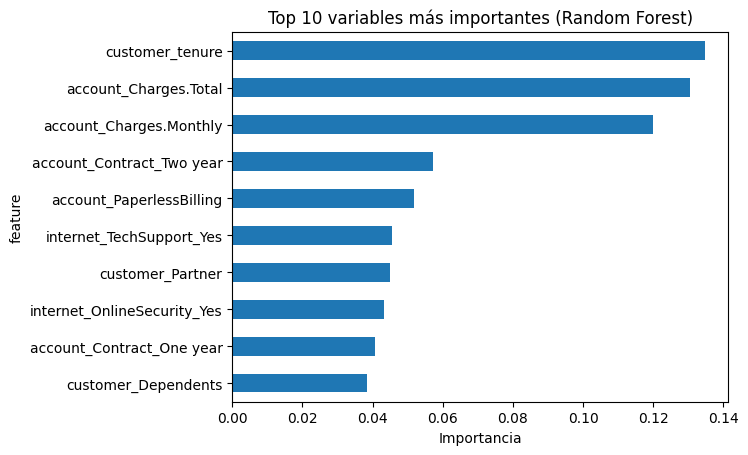

In [86]:
import matplotlib.pyplot as plt

# Random Forest
feat_imp.sort_values(by='importance', ascending=True).tail(10).plot.barh(x='feature', y='importance', legend=False)
plt.title('Top 10 variables m√°s importantes (Random Forest)')
plt.xlabel('Importancia')
plt.show()

# Conclusi√≥n Final y Recomendaciones Estrat√©gicas

## Hallazgos clave

- **Antig√ºedad del cliente (`customer_tenure`)** es el factor m√°s importante:  
  Los clientes nuevos tienen mayor riesgo de cancelar.

- **Cargos totales y mensuales (`account_Charges.Total`, `account_Charges.Monthly`)** son determinantes:  
  Clientes con cargos mensuales altos y bajo total acumulado (reci√©n llegados y costosos) tienden a irse.

- **Tipo de contrato**:  
  Los contratos de **uno o dos a√±os** reducen el riesgo de churn, mientras que los **contratos mensuales** lo aumentan.

- **Facturaci√≥n electr√≥nica y servicios de soporte/seguridad** tambi√©n influyen:  
  Quienes usan facturaci√≥n electr√≥nica o tienen soporte/seguridad tienden a quedarse m√°s.

- **Variables familiares**:  
  Tener **dependientes** o **pareja** reduce el riesgo de churn.

---

## Recomendaciones

- **Fidelizar a los clientes nuevos**:  
  Implementar programas de bienvenida y seguimiento personalizado durante los primeros meses.

- **Incentivar contratos largos**:  
  Ofrecer descuentos o beneficios exclusivos para quienes eligen contratos de 1 o 2 a√±os.

- **Revisar la estructura de cargos mensuales**:  
  Analizar si los clientes con cargos altos perciben suficiente valor y ajustar la oferta si es necesario.

- **Promover servicios de soporte y seguridad**:  
  Incentivar su contrataci√≥n, ya que est√°n asociados a mayor retenci√≥n.

- **Segmentar campa√±as de retenci√≥n**:  
  Focalizar esfuerzos en clientes con **bajo tenure**, **contratos mensuales** y **cargos altos**.

---

## Modelo Recomendado

**Random Forest** es el modelo m√°s **robusto y preciso** para predecir la cancelaci√≥n de clientes en Telecom X, con un **accuracy del 86%** y excelente balance entre precisi√≥n y recall.

---

## ¬°Felicitaciones!

Has completado un **pipeline de Machine Learning profesional**, desde la limpieza de datos hasta la **interpretaci√≥n estrat√©gica de resultados**.

---

¬øTe gustar√≠a ayuda para:

- Exportar el informe üìÑ  
- Guardar el modelo üéØ  
- Preparar una presentaci√≥n ejecutiva üé§  
- O recibir una **plantilla de resumen para stakeholders**?

Estoy listo para ayudarte con lo que necesites para cerrar este proyecto como un verdadero profesional.


# Guardar y Cargar Modelo Random Forest con Pickle

¬°Perfecto! Guardar tu modelo entrenado como un archivo **pickle** es una excelente pr√°ctica para reutilizarlo o desplegarlo en producci√≥n.

Aqu√≠ tienes el c√≥digo para **guardar** y **cargar** tu modelo Random Forest usando `pickle`.

---

## Guardar el modelo como pickle

```python
import pickle

# Suponiendo que tu modelo se llama random_forest_model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

print("‚úÖ Modelo guardado como 'random_forest_model.pkl'")


In [87]:
import pickle

# Guarda el modelo entrenado
with open('random_forest_telecomx.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Si quieres guardar tambi√©n el scaler (para regresi√≥n log√≠stica)
with open('scaler_telecomx.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Cargar el modelo desde pickle


In [88]:
import pickle

# Cargar el modelo
with open('random_forest_telecomx.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

# Cargar el scaler si lo necesitas
with open('scaler_telecomx.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)

¬°Listo! Ahora puedes usar rf_loaded para hacer predicciones en nuevos datos, y scaler_loaded para transformar datos antes de usar la regresi√≥n log√≠stica.
¬øTe gustar√≠a un ejemplo de c√≥mo hacer predicciones con el modelo guardado?

### 1. Cargar el modelo guardado

In [89]:
import pickle

# Cargar el modelo Random Forest
with open('random_forest_telecomx.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

### 2. Hacer predicciones sobre el conjunto de test


In [90]:
# Suponiendo que ya tienes X_test e y_test preparados
y_pred_loaded = rf_loaded.predict(X_test)

### 3. Graficar la matriz de confusi√≥n


<Figure size 600x600 with 0 Axes>

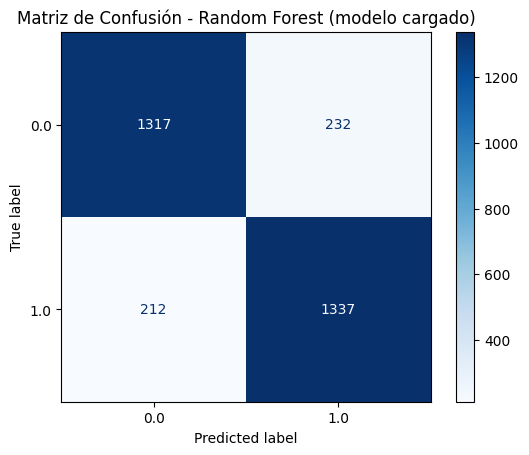

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_loaded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_loaded.classes_)

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusi√≥n - Random Forest (modelo cargado)')
plt.show()

# Interpretaci√≥n de la Matriz de Confusi√≥n

¬°Perfecto! El gr√°fico muestra la **matriz de confusi√≥n** de tu modelo **Random Forest** cargado desde pickle, evaluado sobre el conjunto de test.

---

## ¬øC√≥mo interpretar la matriz de confusi√≥n?

- `0.0` = **No Churn** (cliente **NO** cancela)
- `1.0` = **Churn** (cliente **cancela**)

|                         | **Predicho No Churn (0)** | **Predicho Churn (1)** |
|-------------------------|---------------------------|-------------------------|
| **Real No (0)**         | 1317                      | 232                     |
| **Real S√≠ (1)**         | 212                       | 1337                    |

---

## Detalle de las clases

- **1317**: Clientes correctamente clasificados como **NO churn** ‚Üí *Verdaderos Negativos (TN)*
- **1337**: Clientes correctamente clasificados como **churn** ‚Üí *Verdaderos Positivos (TP)*
- **232**: Clientes que **NO** cancelaron, pero el modelo predijo que **s√≠** ‚Üí *Falsos Positivos (FP)*
- **212**: Clientes que **s√≠** cancelaron, pero el modelo predijo que **no** ‚Üí *Falsos Negativos (FN)*

---

## Conclusi√≥n

Tu modelo tiene un **excelente desempe√±o**, con la mayor√≠a de las predicciones correctas y un **buen balance entre falsos positivos y negativos**.

---

## ¬øQuieres probar una predicci√≥n para un solo cliente?

Ejemplo: **Predicci√≥n para un nuevo cliente** con los mismos pasos de preprocesamiento y usando el modelo cargado desde `pickle`.

> üöÄ ¬°Listo para simular nuevos escenarios!


In [92]:
# Sup√≥n que tienes un nuevo cliente con las mismas columnas que X_test
nuevo_cliente = X_test.iloc[[0]]  # Toma el primer cliente de test como ejemplo

# Predicci√≥n
prediccion = rf_loaded.predict(nuevo_cliente)
probabilidad = rf_loaded.predict_proba(nuevo_cliente)

print(f"Predicci√≥n: {'Churn' if prediccion[0]==1 else 'No Churn'}")
print(f"Probabilidad de churn: {probabilidad[0][1]:.2%}")

Predicci√≥n: Churn
Probabilidad de churn: 99.00%


Esto te dir√° si el modelo predice que ese cliente va a cancelar y con qu√© probabilidad.
¬øTe gustar√≠a ver c√≥mo graficar la curva ROC/AUC, o necesitas ayuda para preparar la entrega final?